<a href="https://colab.research.google.com/github/newrandom/ML_study/blob/main/keras_lstm_lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 로또 번호 예측

- 딥러닝 로또 예측 번호 확인: https://animalface.site/lotto

- 동영상 설명: 유튜브 조코딩 채널(https://www.youtube.com/channel/UCQNE2JmbasNYbjGAcuBiRRg)

- 참고 문헌: 김태영님 블로그(https://tykimos.github.io/2020/01/25/keras_lstm_lotto_v895/)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# !pip install tensorflow-gpu==2.0.0-rc1        (현재 버전이 안맞는 것같음)
# !pip install tensorflow-gpu
# !pip install 'h5py==2.10.0' --force-reinstall

In [ ]:
# numpy 파일 불러오기

import numpy as np

rows = np.loadtxt("./Lotto 1 - 1014.csv", delimiter=",")
row_count = len(rows)
print(row_count)

1014


In [ ]:
print(rows[1])

[2.0000000e+00 9.0000000e+00 1.3000000e+01 2.1000000e+01 2.5000000e+01
 3.2000000e+01 4.2000000e+01 2.0000000e+00 2.0020068e+09 9.4866800e+07
 1.8420000e+06 1.0080000e+05 1.0000000e+04]


In [ ]:
# 당첨번호 원핫 인코딩 변환
import numpy as np

# 당첨번호를 원핫인코딩벡터(ohbin)으로 변환
def numbers2ohbin(numbers):     # numbers의 예시 : 16, 25, 33, 34, 40, 42 와 같은 넘버 리스트로 받아오게 될 것 같음.

    ohbin = np.zeros(45) #45개의 빈 칸을 만듬 // np.zeros(N) 를 사용하면 N개의 0(zero)를 입력함.

    for i in range(6): #여섯개의 당첨번호에 대해서 반복함
        ohbin[int(numbers[i])-1] = 1 #로또번호가 1부터 시작하지만 벡터의 인덱스 시작은 0부터 시작하므로 1을 뺌 // numbers로 받은 값의 자리에 맞게 1을 채움
    
    return ohbin

# 원핫인코딩벡터(ohbin)를 번호로 변환
def ohbin2numbers(ohbin):

    numbers = []
    
    for i in range(len(ohbin)):             # ohbin의 len 값은 45가 나올것 // 
        if ohbin[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가한다.        // i 는 1.0의 값이 나오는 자리의 번호를 나타낼 것임.
            numbers.append(i+1)
    
    return numbers

In [ ]:
numbers = rows[:, 1:7]      # numpy로 받은 파일 전체에서, 1:7 까지의 범위 값을 받아서 저장함.
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count-1]       # 이해 불가 // 로또 1회차부터, 최신차 -1 까지의 값들 : 훈련할 데이터의 값 으로 추정
y_samples = ohbins[1:row_count]         # 이해 불가 // 로또 2회차부터, 최신차 까지의 값들 : 훈련한 데이터를 검증(?)하게 될 값 으로 추정

#원핫인코딩으로 표시
print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

ohbins
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]


In [ ]:
print(ohbins[0])
# print(ohbins[0:row_count-1])
print(len(ohbins[0:row_count-1]))
print(ohbins[1])
print(len(ohbins[1:row_count]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
1013
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1013


In [ ]:
print(numbers)
print(len(numbers))

[[10. 23. 29. 33. 37. 40.]
 [ 9. 13. 21. 25. 32. 42.]
 [11. 16. 19. 21. 27. 31.]
 ...
 [ 5. 11. 18. 20. 35. 45.]
 [21. 22. 26. 34. 36. 41.]
 [ 3. 11. 14. 18. 26. 27.]]
1014


In [ ]:
# 연습용

train_idx = (0, 800)        # 훈련시킬 값의 범위를 변수로 줌
val_idx = (801, 900)        # 검증시킬 값의 범위를 변수로 줌
test_idx = (901, len(x_samples))        # 테스트 할 값의 범위를 변수로 줌 // len(x_samples) 는 최신회차 전까지의 값

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 800), val: (801, 900), test: (901, 1013)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# 모델을 정의합니다.
model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 매 에포크마다 훈련과 검증의 손실 및 정확도를 기록하기 위한 변수
train_loss = []
train_acc = []
val_loss = []
val_acc = []

# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):     # train_idx : 훈련시킬 값의 범위
        
        xs = x_samples[i].reshape(1, 1, 45)     # reshape : 배열 형태를 바꿈
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

epoch    0 train acc 0.018 loss 0.410 val acc 0.051 loss 0.399
epoch    1 train acc 0.021 loss 0.396 val acc 0.040 loss 0.398
epoch    2 train acc 0.018 loss 0.394 val acc 0.030 loss 0.398
epoch    3 train acc 0.020 loss 0.392 val acc 0.020 loss 0.398
epoch    4 train acc 0.024 loss 0.389 val acc 0.020 loss 0.400
epoch    5 train acc 0.031 loss 0.384 val acc 0.020 loss 0.403
epoch    6 train acc 0.048 loss 0.378 val acc 0.020 loss 0.407
epoch    7 train acc 0.051 loss 0.372 val acc 0.020 loss 0.411
epoch    8 train acc 0.051 loss 0.366 val acc 0.040 loss 0.414
epoch    9 train acc 0.061 loss 0.360 val acc 0.040 loss 0.417
epoch   10 train acc 0.054 loss 0.354 val acc 0.040 loss 0.420
epoch   11 train acc 0.060 loss 0.347 val acc 0.030 loss 0.424
epoch   12 train acc 0.070 loss 0.340 val acc 0.030 loss 0.429
epoch   13 train acc 0.083 loss 0.332 val acc 0.030 loss 0.434
epoch   14 train acc 0.101 loss 0.323 val acc 0.040 loss 0.439
epoch   15 train acc 0.102 loss 0.314 val acc 0.030 los

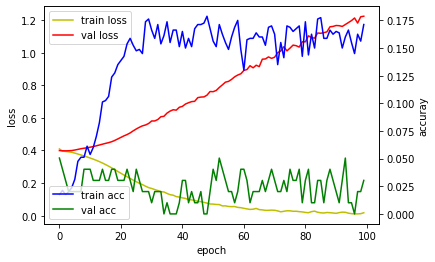

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 88회부터 지금까지 1등부터 5등까지 상금의 평균낸다.
mean_prize = [ np.mean(rows[87:, 8]),
           np.mean(rows[87:, 9]),
           np.mean(rows[87:, 10]),
           np.mean(rows[87:, 11]),
           np.mean(rows[87:, 12])]

print(mean_prize)   

[2435772053.516721, 57204163.662351675, 1450968.9870550162, 52665.56418554477, 5000.0]


In [ ]:
# 등수와 상금을 반환함
# 순위에 오르지 못한 경우에는 등수가 0으로 반환함
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

In [ ]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [ ]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) # 모델의 출력값을 얻음
    
    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) # 6등까지 변수

    for n in range(10): # 10판 수행
        numbers = gen_numbers_from_probability(ys_pred[0])
        
        #i회차 입력 후 나온 출력을 i+1회차와 비교함
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers) 
        
        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1
    
    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)
                        
    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total') 
print('==========')    
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')    

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   5   0   3   2   0   0  12,183,318,505
[   2]   2   0   6   1   1   0   4,880,307,586
[   3]   4   1   4   1   0   0   9,806,148,919
[   4]   4   0   5   1   0   0   9,750,395,724
[   5]   4   0   4   2   0   0   9,748,997,421
[   6]   3   0   4   3   0   0   7,313,278,033
[   7]   3   0   6   1   0   0   7,316,074,640
[   8]   3   0   7   0   0   0   7,317,472,943
[   9]   4   0   4   2   0   0   9,748,997,421
[  10]   1   0   7   2   0   0   2,446,034,167
[  11]   2   0   7   1   0   0   4,881,753,555
[  12]   2   0   6   2   0   0   4,880,355,252
[  13]   2   0   5   3   0   0   4,878,956,948
[  14]   0   0   6   3   0   1       8,863,810
[  15]   3   0   4   3   0   0   7,313,278,033
[  16]   1   0   5   3   1   0   2,443,189,895
[  17]   5   0   4   1   0   0  12,184,716,809
[  18]   2   0   6   2   0   0   4,880,355,252
[  19]   2   0   4   3   1   0   4,877,510,979
[  20]   1   0   7   2   0   0   2,446,034,167
[  21]   0   0   5   

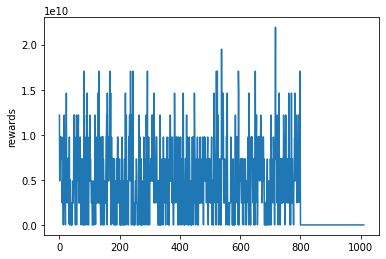

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

total_reward = train_total_reward + val_total_reward + test_total_reward

plt.plot(total_reward)
plt.ylabel('rewards')
plt.show()

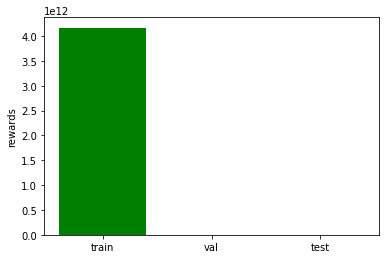

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

rewards = [sum(train_total_reward), sum(val_total_reward), sum(test_total_reward)]

class_color=['green', 'blue', 'red']

plt.bar(['train', 'val', 'test'], rewards, color=class_color)
plt.ylabel('rewards')
plt.show()

In [ ]:
# 최대 100번 에포크까지 수행
for epoch in range(100):

    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))  

epoch    0 train acc 0.146 loss 0.143
epoch    1 train acc 0.143 loss 0.178
epoch    2 train acc 0.145 loss 0.179
epoch    3 train acc 0.146 loss 0.173
epoch    4 train acc 0.148 loss 0.166
epoch    5 train acc 0.147 loss 0.159
epoch    6 train acc 0.146 loss 0.152
epoch    7 train acc 0.147 loss 0.146
epoch    8 train acc 0.147 loss 0.140
epoch    9 train acc 0.147 loss 0.135
epoch   10 train acc 0.148 loss 0.130
epoch   11 train acc 0.148 loss 0.126
epoch   12 train acc 0.148 loss 0.122
epoch   13 train acc 0.149 loss 0.118
epoch   14 train acc 0.149 loss 0.115
epoch   15 train acc 0.150 loss 0.112
epoch   16 train acc 0.150 loss 0.109
epoch   17 train acc 0.150 loss 0.106
epoch   18 train acc 0.150 loss 0.103
epoch   19 train acc 0.150 loss 0.100
epoch   20 train acc 0.150 loss 0.098
epoch   21 train acc 0.149 loss 0.096
epoch   22 train acc 0.150 loss 0.094
epoch   23 train acc 0.150 loss 0.091
epoch   24 train acc 0.150 loss 0.089
epoch   25 train acc 0.150 loss 0.088
epoch   26 t

In [ ]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(3):
    numbers = gen_numbers_from_probability(ys_pred[0])
    numbers.sort()
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)


# print(list_numbers)

receive numbers
0 : [3, 7, 18, 26, 31, 44]
1 : [3, 12, 18, 24, 26, 44]
2 : [3, 7, 12, 24, 26, 44]


- 딥러닝 로또 예측 번호 확인: https://animalface.site/lotto

- 동영상 설명: 유튜브 조코딩 채널(https://www.youtube.com/channel/UCQNE2JmbasNYbjGAcuBiRRg)

- 참고 문헌: 김태영님 블로그(https://tykimos.github.io/2020/01/25/keras_lstm_lotto_v895/)

In [ ]:
# 1,000회 중 가장 많은 값을 받아들인 6가지 수를 받아보자
final_numbers = {}
for _ in range(1,46):
    final_numbers[_] = 0        # 1~45 까지의 번호의 수를 0으로 초기화

for _ in range(100):
    xs = x_samples[-1].reshape(1, 1, 45)

    ys_pred = model.predict_on_batch(xs)

    # list_numbers = []       # 번호를 저장할 리스트

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        # numbers.sort()      # 최종 값의 수를 받을 것이기 때문에 sort 굳이 필요하지 않음.
        # print('{0} : {1}'.format(n, numbers))
        # list_numbers.append(numbers)
        
        for num in numbers:
            if num in final_numbers:
                final_numbers[num] += 1

In [ ]:
final_numbers

{1: 49,
 2: 26,
 3: 664,
 4: 26,
 5: 295,
 6: 137,
 7: 373,
 8: 15,
 9: 24,
 10: 29,
 11: 69,
 12: 808,
 13: 25,
 14: 206,
 15: 213,
 16: 18,
 17: 199,
 18: 801,
 19: 219,
 20: 169,
 21: 26,
 22: 26,
 23: 29,
 24: 38,
 25: 52,
 26: 21,
 27: 19,
 28: 17,
 29: 15,
 30: 18,
 31: 27,
 32: 24,
 33: 20,
 34: 16,
 35: 18,
 36: 19,
 37: 17,
 38: 21,
 39: 334,
 40: 13,
 41: 38,
 42: 28,
 43: 260,
 44: 408,
 45: 131}

In [ ]:
# 10,000회 중 가장 많은 값을 받아들인 6가지 수를 받아보자
final_numbers = {}
for _ in range(1,46):
    final_numbers[_] = 0        # 1~45 까지의 번호의 수를 0으로 초기화

for _ in range(1000):
    xs = x_samples[-1].reshape(1, 1, 45)

    ys_pred = model.predict_on_batch(xs)

    # list_numbers = []       # 번호를 저장할 리스트

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        # numbers.sort()      # 최종 값의 수를 받을 것이기 때문에 sort 굳이 필요하지 않음.
        # print('{0} : {1}'.format(n, numbers))
        # list_numbers.append(numbers)
        
        for num in numbers:
            if num in final_numbers:
                final_numbers[num] += 1

final_numbers

{1: 299,
 2: 224,
 3: 6609,
 4: 189,
 5: 2891,
 6: 725,
 7: 4732,
 8: 181,
 9: 184,
 10: 207,
 11: 525,
 12: 8419,
 13: 221,
 14: 2277,
 15: 2436,
 16: 193,
 17: 1185,
 18: 7997,
 19: 1941,
 20: 1521,
 21: 364,
 22: 248,
 23: 310,
 24: 953,
 25: 346,
 26: 180,
 27: 182,
 28: 182,
 29: 203,
 30: 196,
 31: 197,
 32: 189,
 33: 214,
 34: 218,
 35: 177,
 36: 206,
 37: 190,
 38: 194,
 39: 3929,
 40: 193,
 41: 478,
 42: 190,
 43: 2574,
 44: 3711,
 45: 1220}

In [ ]:
# 100,000회 중 가장 많은 값을 받아들인 6가지 수를 받아보자
final_numbers = {}
for _ in range(1,46):
    final_numbers[_] = 0        # 1~45 까지의 번호의 수를 0으로 초기화

for _ in range(10000):
    xs = x_samples[-1].reshape(1, 1, 45)

    ys_pred = model.predict_on_batch(xs)

    # list_numbers = []       # 번호를 저장할 리스트

    for n in range(10):
        numbers = gen_numbers_from_probability(ys_pred[0])
        # numbers.sort()      # 최종 값의 수를 받을 것이기 때문에 sort 굳이 필요하지 않음.
        # print('{0} : {1}'.format(n, numbers))
        # list_numbers.append(numbers)
        
        for num in numbers:
            if num in final_numbers:
                final_numbers[num] += 1

final_numbers

{1: 2842,
 2: 2354,
 3: 65362,
 4: 1934,
 5: 28579,
 6: 7370,
 7: 47633,
 8: 1944,
 9: 1912,
 10: 2357,
 11: 5357,
 12: 83881,
 13: 2192,
 14: 22613,
 15: 23634,
 16: 1944,
 17: 12264,
 18: 79511,
 19: 19559,
 20: 15264,
 21: 3694,
 22: 2398,
 23: 3598,
 24: 10631,
 25: 3623,
 26: 1855,
 27: 1916,
 28: 1872,
 29: 1866,
 30: 1941,
 31: 1897,
 32: 1853,
 33: 1894,
 34: 2171,
 35: 1881,
 36: 1870,
 37: 1845,
 38: 1927,
 39: 38996,
 40: 1895,
 41: 4687,
 42: 1903,
 43: 25523,
 44: 37477,
 45: 12281}

In [ ]:
# 2,943회 중 가장 많은 값을 받아들인 6가지 수를 받아보자
final_numbers = {}
for _ in range(1,46):
    final_numbers[_] = 0        # 1~45 까지의 번호의 수를 0으로 초기화

for _ in range(2943):
    xs = x_samples[-1].reshape(1, 1, 45)

    ys_pred = model.predict_on_batch(xs)

    numbers = gen_numbers_from_probability(ys_pred[0])
    
    for num in numbers:
        if num in final_numbers:
            final_numbers[num] += 1

final_numbers

{1: 79,
 2: 72,
 3: 1893,
 4: 45,
 5: 916,
 6: 214,
 7: 1416,
 8: 51,
 9: 71,
 10: 64,
 11: 148,
 12: 2468,
 13: 77,
 14: 669,
 15: 716,
 16: 59,
 17: 365,
 18: 2289,
 19: 570,
 20: 421,
 21: 113,
 22: 79,
 23: 117,
 24: 343,
 25: 118,
 26: 48,
 27: 48,
 28: 53,
 29: 44,
 30: 50,
 31: 56,
 32: 67,
 33: 59,
 34: 73,
 35: 61,
 36: 53,
 37: 52,
 38: 55,
 39: 1152,
 40: 45,
 41: 162,
 42: 57,
 43: 725,
 44: 1093,
 45: 332}